<img style="float: center;" src="fig/uni72.png" width="200px">
<h2> <center>Especialização em Engenharia de Software - Turma 13 <br><br>- Módulo de Análise de Dados -</center></h2>



# 1. Estudo de Caso

<img style="float: center;" src="fig/stateofdata.png" width="320px"> 
<br>

<h2> <center>O mais completo mapeamento do mercado brasileiro de dados<br><br>- [Data Hackers + Bain] - Nov/2022 -</center></h2>
<br>
https://www.kaggle.com/datasets/datahackers/state-of-data-2022?select=State_of_data_2022.csv <br>

#### Data Set Characteristics:
   
    Number of Instances
        - 4.271 

    Number of Attributes
        - 353 


# 2. Aplicação

    - Principais Bibliotecas: Pandas, Numpy, Matplotlib 
   

Notebook adapatado de Fábio Damacena

https://www.kaggle.com/code/fabiodamacena/explora-o-dos-dados-e-insights-sobre-sal-rios/notebook#%C3%8Dndice

## 2.1 Importação dos módulos requeridos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [2]:
import regex # Regular Expressions


## 2.2 Início do Bloco Principal

In [3]:
# definição de parâmetros do pandas para apresentação das colunas e linhas do dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df_data = pd.read_csv("datasets/State_of_data_2022.csv", sep=',', thousands = ".",
                           index_col=None)

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Columns: 353 entries, ('P0', 'id') to ('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')
dtypes: bool(1), float64(284), object(68)
memory usage: 11.5+ MB


In [6]:
# remove registros duplicados
df_data.drop_duplicates(inplace=True)


In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4270 entries, 0 to 4270
Columns: 353 entries, ('P0', 'id') to ('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')
dtypes: bool(1), float64(284), object(68)
memory usage: 11.5+ MB


In [8]:
df_data.columns.tolist()

["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_1 ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_c ', 'Cor/raca/etnia')",
 "('P1_d ', 'PCD')",
 "('P1_e ', 'experiencia_profissional_prejudicada')",
 "('P1_f ', 'aspectos_prejudicados')",
 "('P1_g ', 'vive_no_brasil')",
 "('P1_i ', 'Estado onde mora')",
 "('P1_i_1 ', 'uf onde mora')",
 "('P1_i_2 ', 'Regiao onde mora')",
 "('P1_j ', 'Mudou de Estado?')",
 "('P1_k ', 'Regiao de origem')",
 "('P1_l ', 'Nivel de Ensino')",
 "('P1_m ', 'Área de Formação')",
 "('P2_a ', 'Qual sua situação atual de trabalho?')",
 "('P2_b ', 'Setor')",
 "('P2_c ', 'Numero de Funcionarios')",
 "('P2_d ', 'Gestor?')",
 "('P2_e ', 'Cargo como Gestor')",
 "('P2_f ', 'Cargo Atual')",
 "('P2_g ', 'Nivel')",
 "('P2_h ', 'Faixa salarial')",
 "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
 "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
 "('P2_k ', 'Você 

In [9]:
df_data.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')","('P1_i_1 ', 'uf onde mora')","('P1_i_2 ', 'Regiao onde mora')","('P1_j ', 'Mudou de Estado?')","('P1_k ', 'Regiao de origem')","('P1_l ', 'Nivel de Ensino')","('P1_m ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_2 ', 'Salário atual não corresponde ao mercado')","('P2_l_3 ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_4 ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_5 ', 'Gostaria de receber mais benefícios')","('P2_l_6 ', 'O clima de trabalho/ambiente não é bom')","('P2_l_7 ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_1 ', 'Remuneração/Salário')","('P2_o_2 ', 'Benefícios')","('P2_o_3 ', 'Propósito do trabalho e da empresa')","('P2_o_4 ', 'Flexibilidade de trabalho remoto')","('P2_o_5 ', 'Ambiente e clima de trabalho')","('P2_o_6 ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_7 ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_8 ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_9 ', 'Qualidade dos gestores e líderes')","('P2_o_10 ', 'Reputação que a empresa tem no mercado')","('P2_p ', 'Atualmente qual a sua forma de trabalho?')","('P2_q ', 'Qual a forma de trabalho ideal para você?')","('P2_r ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P2_s ', 'Sua empresa passu por Layoff em 2022?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_b_1 ', 'Analytics Engineer')","('P3_b_2 ', 'Engenharia de Dados/Data Engineer')","('P3_b_3 ', 'Analista de Dados/Data Analyst')","('P3_b_4 ', 'Cientista de Dados/Data Scientist')","('P3_b_5 ', 'Database Administrator/DBA')","('P3_b_6 ', 'Analista de Business Intelligence/BI')","('P3_b_7 ', 'Arquiteto de Dados/Data Architect')","('P3_b_8 ', 'Data Product Manager/DPM')","('P3_b_9 ', 'Business Analyst')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_c_1 ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_2 ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_3 ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_4 ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_5 ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_6 ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as

### Tratamento dos Dados

In [10]:
# Função para separação das colunas por questão
def prefixo_colunas(prefix="('P0"):
    # Retorna as colunas do DataFrame que começam com o prefixo determinado
    return [x for x in df_data.columns.tolist() if x.startswith(prefix)]


In [11]:
# Separação dos datasets por questão/tema
P1 = df_data.loc[:, prefixo_colunas(prefix="('P1")]
P2 = df_data.loc[:, prefixo_colunas(prefix="('P2")]
P3 = df_data.loc[:, prefixo_colunas(prefix="('P3")]
P4 = df_data.loc[:, prefixo_colunas(prefix="('P4")]
P5 = df_data.loc[:, prefixo_colunas(prefix="('P5")]
P6 = df_data.loc[:, prefixo_colunas(prefix="('P6")]
P7 = df_data.loc[:, prefixo_colunas(prefix="('P7")]
P8 = df_data.loc[:, prefixo_colunas(prefix="('P8")]

In [12]:
P1.head()

,"('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')","('P1_i_1 ', 'uf onde mora')","('P1_i_2 ', 'Regiao onde mora')","('P1_j ', 'Mudou de Estado?')","('P1_k ', 'Regiao de origem')","('P1_l ', 'Nivel de Ensino')","('P1_m ', 'Área de Formação')"
0,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),DF,Centro-oeste,False,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...
1,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),PA,Norte,True,NaN,Graduação/Bacharelado,Outras Engenharias
2,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),DF,Centro-oeste,False,Sul,Pós-graduação,Computação / Engenharia de Software / Sistemas...
3,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),MG,Sudeste,True,NaN,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...
4,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),PA,Norte,True,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...


In [13]:
# Função para renomear colunas
# Função para ajustar texto das colunas do dataframe, as quais possuem padrão com caracteres especiais e código inicial
def renomeia_colunas(df):
    # Coleta o nome original das colunas
    colunas = df.columns 

    # Cria um código Regex para filtrar os caracteres de texto
    t = regex.compile(r'[A-Z0-9a-z_\? \/\,\p{Script=Latin}\p{M}?]+') 

    # Cria um dicionário para receber como chave o nome original da coluna e como valor um objeto regex
    dicio_regex = dict() 
    
    # Cria iteração para salvar chaves e valores no dicionário
    for i in colunas: 
        # Em cada iteração aplica função finditer no texto original da coluna
        check_texto = t.finditer(i) 
        # Em cada iteração salva nome original na chave e objeto regex no valor
        dicio_regex[i] = check_texto 

    # Cria uma lista para receber os nomes das colunas originais transformados pelo regex 
    lista_regex = list() 
    
    # Em cada iteração vai pegar o objeto regex
    for i in dicio_regex.values(): 
        # Em cada iteração capta o match do objeto regex
        for match in i:  
            # Para cada match, cria um objeto que copia o texto filtrado por meio do Regex
            texto_transformado = match.group(0)

        # Salva o texto filtrado por meio do objeto Regex na lista criada
        lista_regex.append(texto_transformado) 

    # Renomeia as colunas originais do dataframe com os textos filtrados armazenados na nossa lista
    df.columns = lista_regex 

In [14]:
# Tratamento tema 1
renomeia_colunas(P1)

In [15]:
P1.head()

,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,uf onde mora,Regiao onde mora,Mudou de Estado?,Regiao de origem,Nivel de Ensino,Área de Formação
0,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),DF,Centro-oeste,False,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...
1,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),PA,Norte,True,NaN,Graduação/Bacharelado,Outras Engenharias
2,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),DF,Centro-oeste,False,Sul,Pós-graduação,Computação / Engenharia de Software / Sistemas...
3,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),MG,Sudeste,True,NaN,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...
4,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),PA,Norte,True,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...


In [16]:
P1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4270 entries, 0 to 4270
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Idade                                 4196 non-null   float64
 1   Faixa idade                           4270 non-null   object 
 2   Genero                                4261 non-null   object 
 3   Cor/raca/etnia                        4270 non-null   object 
 4   PCD                                   4270 non-null   object 
 5   experiencia_profissional_prejudicada  2189 non-null   object 
 6   aspectos_prejudicados                 836 non-null    object 
 7   vive_no_brasil                        4270 non-null   bool   
 8   Estado onde mora                      4155 non-null   object 
 9   uf onde mora                          4155 non-null   object 
 10  Regiao onde mora                      4170 non-null   object 
 11  Mudou de Estado? 

In [17]:
# Tratamento tema 2
# Separa dados das questões cujas respostas estão estruturadas como variáveis binárias (dummies):
P2_l = df_data[prefixo_colunas(prefix="('P2_l")]
P2_o = df_data[prefixo_colunas(prefix="('P2_o")]

P2 = P2.drop(P2.columns[[11,12,13,14,15,16,17,18,
                        21,22,23,24,25,26,27,28,29,30,31]], axis=1)

In [18]:
renomeia_colunas(P2)


In [19]:
P2.head()

,Qual sua situação atual de trabalho?,Setor,Numero de Funcionarios,Gestor?,Cargo como Gestor,Cargo Atual,Nivel,Faixa salarial,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?
0,Servidor Público,Setor Público,Acima de 3.000,False,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,True,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
1,Empregado (CLT),Outra Opção,Acima de 3.000,True,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,False,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
2,Empregado (CLT),Finanças ou Bancos,Acima de 3.000,False,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,False,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...
3,Empregado (CLT),Setor Automotivo,Acima de 3.000,False,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...
4,Servidor Público,Setor Público,de 101 a 500,False,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,False,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...


In [20]:
# P2.info()

## 2.3 Explorando os Dados


In [21]:
P1.isna().sum()

Idade                                     74
Faixa idade                                0
Genero                                     9
Cor/raca/etnia                             0
PCD                                        0
experiencia_profissional_prejudicada    2081
aspectos_prejudicados                   3434
vive_no_brasil                             0
Estado onde mora                         115
uf onde mora                             115
Regiao onde mora                         100
Mudou de Estado?                         100
Regiao de origem                        3498
Nivel de Ensino                            0
Área de Formação                         122
dtype: int64

In [22]:
P1["Genero"].value_counts()

Masculino               3194
Feminino                1055
Prefiro não informar      12
Name: Genero, dtype: int64

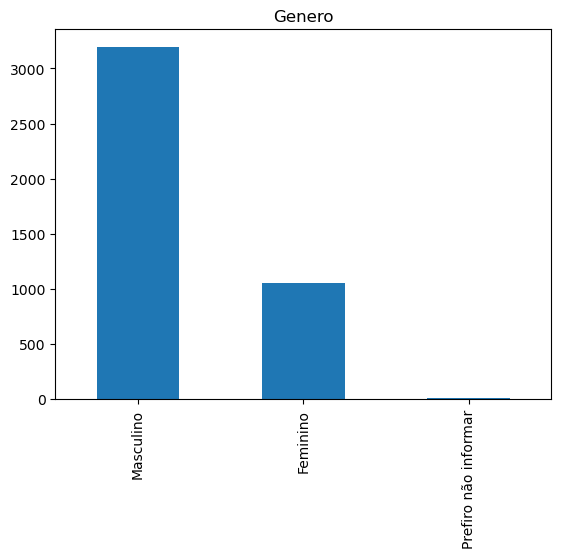

In [23]:
P1["Genero"].value_counts().plot(kind = "bar")
plt.title("Genero")
plt.show()

In [24]:
P1["Nivel de Ensino"].value_counts()

Graduação/Bacharelado         1510
Pós-graduação                 1313
Estudante de Graduação         613
Mestrado                       521
Doutorado ou Phd               191
Não tenho graduação formal     110
Prefiro não informar            12
Name: Nivel de Ensino, dtype: int64

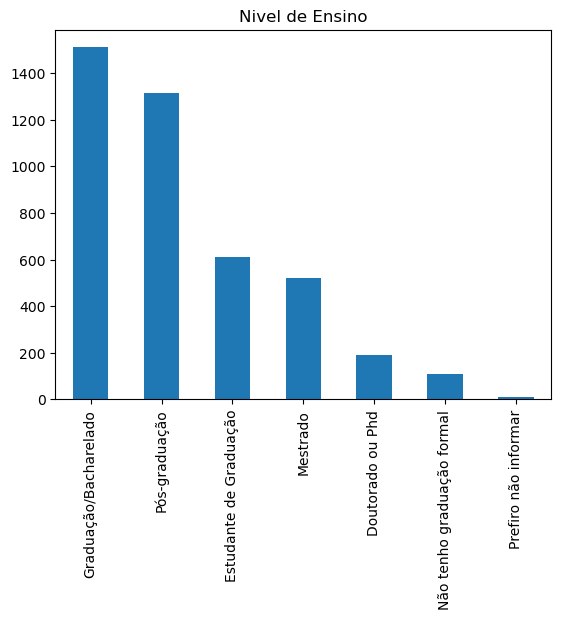

In [25]:
P1["Nivel de Ensino"].value_counts().plot(kind = "bar")
plt.title("Nivel de Ensino")
plt.show()

In [26]:
P1["uf onde mora"].value_counts()

SP    1745
MG     478
RJ     338
PR     308
RS     204
BA     162
SC     156
DF     132
PE     120
CE      95
ES      81
GO      55
PB      42
RN      38
PA      35
AL      32
SE      28
MA      28
AM      26
MT      19
PI      17
MS      16
Name: uf onde mora, dtype: int64

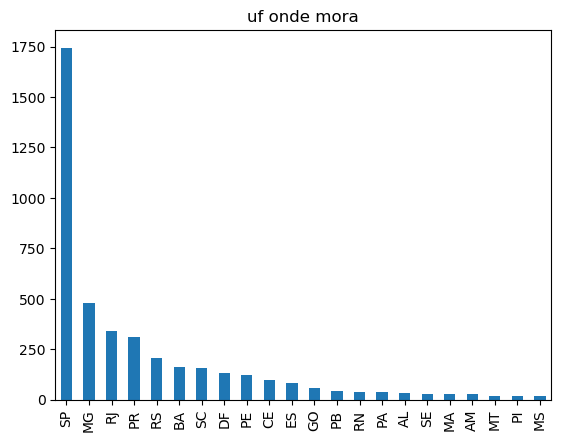

In [27]:
P1["uf onde mora"].value_counts().plot(kind = "bar")
plt.title("uf onde mora")
plt.show()

In [28]:
P1["Faixa idade"].value_counts()

25-29    1398
30-34    1095
35-39     598
22-24     449
40-44     277
17-21     152
45-49     144
50-54      89
55+        68
Name: Faixa idade, dtype: int64

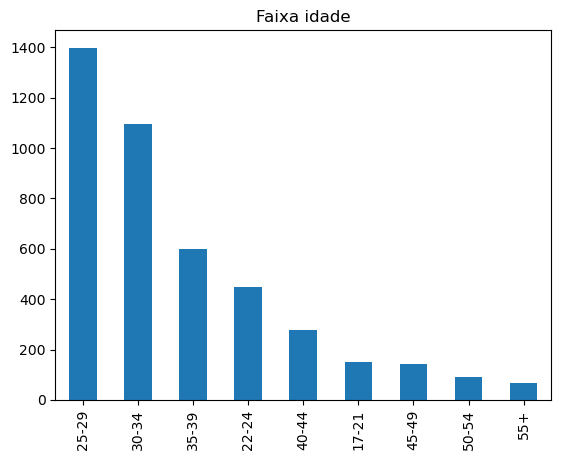

In [29]:
P1["Faixa idade"].value_counts().plot(kind = "bar")
plt.title("Faixa idade")
plt.show()

In [30]:
P1["Idade"].value_counts()

27.0    299
28.0    291
26.0    281
25.0    274
31.0    253
29.0    253
30.0    248
32.0    225
24.0    196
34.0    189
33.0    180
36.0    154
23.0    145
35.0    145
37.0    118
22.0    108
39.0    103
38.0     78
21.0     78
40.0     67
41.0     63
42.0     54
43.0     51
44.0     42
45.0     41
50.0     34
20.0     33
47.0     32
46.0     31
19.0     22
48.0     21
52.0     20
49.0     19
54.0     13
18.0     13
53.0     12
51.0     10
Name: Idade, dtype: int64

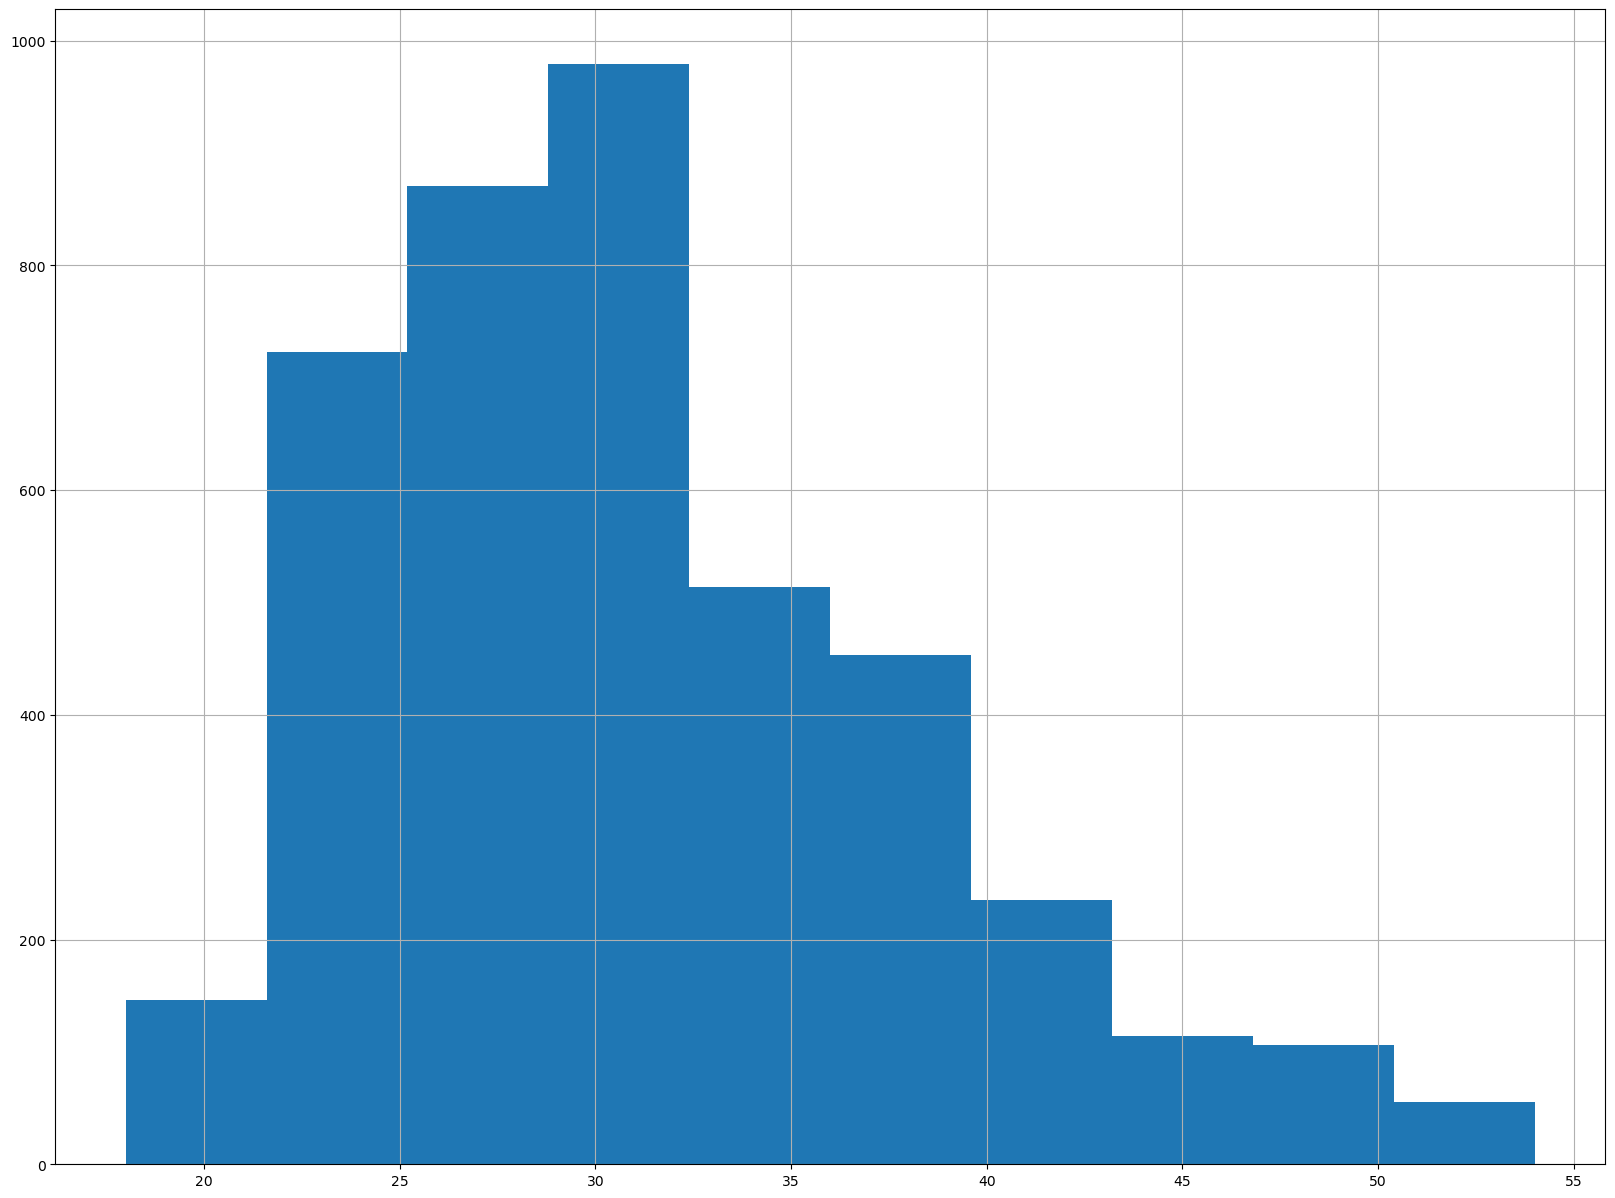

In [31]:
P1['Idade'].hist(bins=10, figsize=(20,15))
plt.show()

In [32]:
P2.isna().sum()


Qual sua situação atual de trabalho?                                                                                            0
Setor                                                                                                                         577
Numero de Funcionarios                                                                                                        577
Gestor?                                                                                                                       577
Cargo como Gestor                                                                                                            3558
Cargo Atual                                                                                                                  1289
Nivel                                                                                                                        1289
Faixa salarial                                                                            

In [33]:
P2["Faixa salarial"].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     752
de R$ 4.001/mês a R$ 6.000/mês      584
de R$ 6.001/mês a R$ 8.000/mês      527
de R$ 12.001/mês a R$ 16.000/mês    437
de R$ 3.001/mês a R$ 4.000/mês      303
de R$ 2.001/mês a R$ 3.000/mês      285
de R$ 16.001/mês a R$ 20.000/mês    229
de R$ 1.001/mês a R$ 2.000/mês      216
de R$ 20.001/mês a R$ 25.000/mês    133
de R$ 25.001/mês a R$ 30.000/mês     77
de R$ 30.001/mês a R$ 40.000/mês     70
Acima de R$ 40.001/mês               45
Menos de R$ 1.000/mês                35
Name: Faixa salarial, dtype: int64

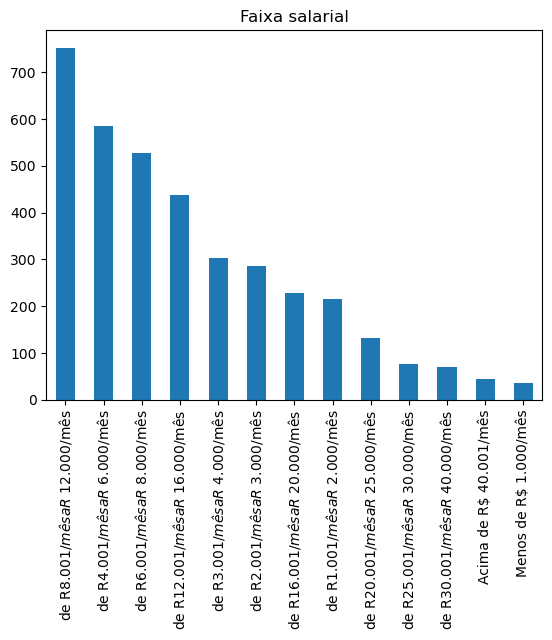

In [34]:
P2["Faixa salarial"].value_counts().plot(kind = "bar")
plt.title("Faixa salarial")
plt.show()

In [35]:
P2["Cargo Atual"].value_counts()

Analista de Dados/Data Analyst                                         639
Cientista de Dados/Data Scientist                                      556
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect    490
Analista de BI/BI Analyst                                              378
Outra Opção                                                            281
Analista de Negócios/Business Analyst                                  123
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas            106
Analista de Suporte/Analista Técnico                                    72
Analytics Engineer                                                      70
Engenheiro de Machine Learning/ML Engineer                              69
Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)                      51
Analista de Inteligência de Mercado/Market Intelligence                 29
Outras Engenharias (não inclui dev)                                     28
Professor                

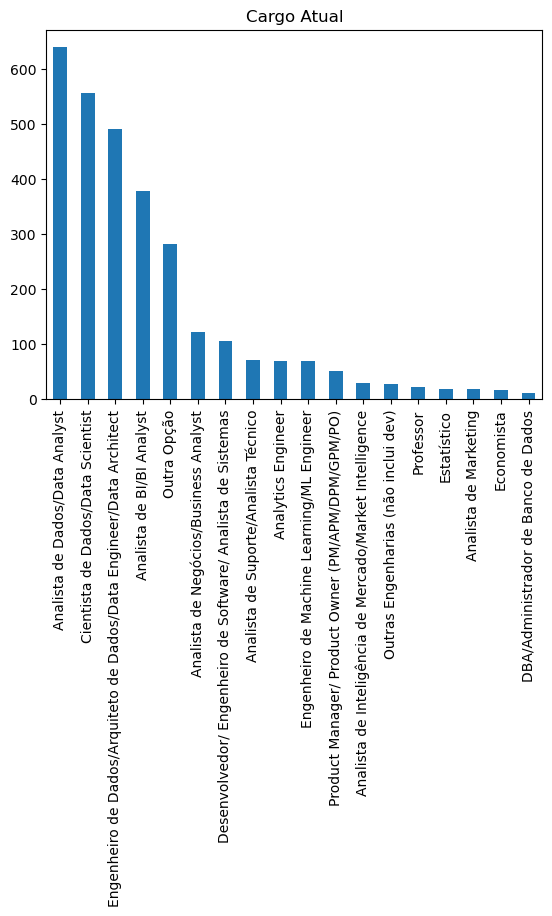

In [36]:
P2["Cargo Atual"].value_counts().plot(kind = "bar")
plt.title("Cargo Atual")
plt.show()

### transformando os dados

In [37]:
P1['Nr Faixa idade'] = 0
P1.loc[P1["Faixa idade"] == '25-29',"Nr Faixa idade"] = 1
P1.loc[P1["Faixa idade"] == '30-34',"Nr Faixa idade"] = 2
P1.loc[P1["Faixa idade"] == '35-39',"Nr Faixa idade"] = 3
P1.loc[P1["Faixa idade"] == '22-24',"Nr Faixa idade"] = 4
P1.loc[P1["Faixa idade"] == '40-44',"Nr Faixa idade"] = 5
P1.loc[P1["Faixa idade"] == '17-21',"Nr Faixa idade"] = 6
P1.loc[P1["Faixa idade"] == '45-49',"Nr Faixa idade"] = 7
P1.loc[P1["Faixa idade"] == '50-54',"Nr Faixa idade"] = 8
P1.loc[P1["Faixa idade"] == '55+',"Nr Faixa idade"] = 9

In [38]:
P1["Nr Faixa idade"].value_counts()

1    1398
2    1095
3     598
4     449
5     277
6     152
7     144
8      89
9      68
Name: Nr Faixa idade, dtype: int64

In [39]:
P1[P1['Nr Faixa idade'] == 0]

,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,uf onde mora,Regiao onde mora,Mudou de Estado?,Regiao de origem,Nivel de Ensino,Área de Formação,Nr Faixa idade


In [40]:
P1['Nr Genero'] = 0
P1.loc[P1["Genero"] == 'Masculino',"Nr Genero"] = 1
P1.loc[P1["Genero"] == 'Feminino',"Nr Genero"] = 2
P1.loc[P1["Genero"] == 'Prefiro não informar',"Nr Genero"] = 3


In [41]:
P1["Nr Genero"].value_counts()

1    3194
2    1055
3      12
0       9
Name: Nr Genero, dtype: int64

In [42]:
P1[P1['Nr Genero'] == 0]

,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,uf onde mora,Regiao onde mora,Mudou de Estado?,Regiao de origem,Nivel de Ensino,Área de Formação,Nr Faixa idade,Nr Genero
232,27.0,25-29,NaN,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,Paraná (PR),PR,Sul,True,NaN,Pós-graduação,Ciências Sociais,1,0
1484,26.0,25-29,NaN,Preta,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,São Paulo (SP),SP,Sudeste,True,NaN,Graduação/Bacharelado,Outras Engenharias,1,0
1792,25.0,25-29,NaN,Parda,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,Goiás (GO),GO,Centro-oeste,True,NaN,Estudante de Graduação,Ciências Sociais,1,0
1975,26.0,25-29,NaN,Branca,Não,"Sim, acredito que a minha a experiência profis...","Aprovação em processos seletivos/entrevistas, ...",True,São Paulo (SP),SP,Sudeste,True,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,1,0
2463,25.0,25-29,NaN,Preta,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,Distrito Federal (DF),DF,Centro-oeste,True,NaN,Graduação/Bacharelado,Ciências Sociais,1,0
2583,27.0,25-29,NaN,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,São Paulo (SP),SP,Sudeste,False,Sudeste,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,1,0
3302,29.0,25-29,NaN,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Santa Catarina (SC),SC,Sul,False,Sudeste,Pós-graduação,Outra opção,1,0
3722,23.0,22-24,NaN,Branca,Não,"Sim, acredito que a minha a experiência profis...","Aprovação em processos seletivos/entrevistas, ...",True,São Paulo (SP),SP,Sudeste,True,NaN,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,4,0
3955,24.0,22-24,NaN,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),SP,Sudeste,True,NaN,Mestrado,Outras Engenharias,4,0


In [43]:
P2['Nr Situacao Atual Trab'] = 0

P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Empregado (CLT)', "Nr Situacao Atual Trab"] = 1
P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Empreendedor ou Empregado (CNPJ)', "Nr Situacao Atual Trab"] = 2
P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Desempregado, buscando recolocação', "Nr Situacao Atual Trab"] = 3 
P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Estagiário', "Nr Situacao Atual Trab"] = 4
P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Servidor Público', "Nr Situacao Atual Trab"] = 5
P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Trabalho na área Acadêmica/Pesquisador', "Nr Situacao Atual Trab"] = 6
P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Somente Estudante (graduação)', "Nr Situacao Atual Trab"] = 7
P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil', "Nr Situacao Atual Trab"] = 8
P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Vivo fora do Brasil e trabalho para empresa de fora do Brasil', "Nr Situacao Atual Trab"] = 9
P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Somente Estudante (pós-graduação)', "Nr Situacao Atual Trab"] = 10
P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Freelancer', "Nr Situacao Atual Trab"] = 11
P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Prefiro não informar', "Nr Situacao Atual Trab"] = 12
P2.loc[P2["Qual sua situação atual de trabalho?"] == 'Desempregado e não estou buscando recolocação', "Nr Situacao Atual Trab"] = 13

In [44]:
P2["Nr Situacao Atual Trab"].value_counts()

1     2761
2      410
3      350
4      188
5      156
6       86
7       82
8       69
9       46
10      44
11      39
12      24
13      15
Name: Nr Situacao Atual Trab, dtype: int64

In [45]:
P2['Nr Faixa salarial'] = 0
P2.loc[P2["Faixa salarial"] == 'de R$ 8.001/mês a R$ 12.000/mês', "Nr Faixa salarial"] = 1
P2.loc[P2["Faixa salarial"] == 'de R$ 4.001/mês a R$ 6.000/mês', "Nr Faixa salarial"]=2
P2.loc[P2["Faixa salarial"] == 'de R$ 4.001/mês a R$ 6.000/mês', "Nr Faixa salarial"]=2
P2.loc[P2["Faixa salarial"] == 'de R$ 6.001/mês a R$ 8.000/mês', "Nr Faixa salarial"]=3
P2.loc[P2["Faixa salarial"] == 'de R$ 12.001/mês a R$ 16.000/mês', "Nr Faixa salarial"]=4
P2.loc[P2["Faixa salarial"] == 'de R$ 3.001/mês a R$ 4.000/mês', "Nr Faixa salarial"]=5
P2.loc[P2["Faixa salarial"] == 'de R$ 2.001/mês a R$ 3.000/mês', "Nr Faixa salarial"]=6
P2.loc[P2["Faixa salarial"] == 'de R$ 16.001/mês a R$ 20.000/mês', "Nr Faixa salarial"]=7
P2.loc[P2["Faixa salarial"] == 'de R$ 1.001/mês a R$ 2.000/mês', "Nr Faixa salarial"]=8
P2.loc[P2["Faixa salarial"] == 'de R$ 20.001/mês a R$ 25.000/mês', "Nr Faixa salarial"]=9
P2.loc[P2["Faixa salarial"] == 'de R$ 25.001/mês a R$ 30.000/mês', "Nr Faixa salarial"]=10
P2.loc[P2["Faixa salarial"] == 'de R$ 30.001/mês a R$ 40.000/mês', "Nr Faixa salarial"]=11
P2.loc[P2["Faixa salarial"] == 'Acima de R$ 40.001/mês', "Nr Faixa salarial"]=12
P2.loc[P2["Faixa salarial"] == 'Menos de R$ 1.000/mês', "Nr Faixa salarial"]=13

In [46]:
P2["Nr Faixa salarial"].value_counts()

1     752
2     584
0     577
3     527
4     437
5     303
6     285
7     229
8     216
9     133
10     77
11     70
12     45
13     35
Name: Nr Faixa salarial, dtype: int64

In [47]:
x=P2[P2['Nr Faixa salarial'] == 0].groupby(P2['Qual sua situação atual de trabalho?']).count()
x['Qual sua situação atual de trabalho?']

Qual sua situação atual de trabalho?
Desempregado e não estou buscando recolocação     15
Desempregado, buscando recolocação               350
Somente Estudante (graduação)                     82
Somente Estudante (pós-graduação)                 44
Trabalho na área Acadêmica/Pesquisador            86
Name: Qual sua situação atual de trabalho?, dtype: int64

In [48]:
P2['Qual sua situação atual de trabalho?'].value_counts()

Empregado (CLT)                                                    2761
Empreendedor ou Empregado (CNPJ)                                    410
Desempregado, buscando recolocação                                  350
Estagiário                                                          188
Servidor Público                                                    156
Trabalho na área Acadêmica/Pesquisador                               86
Somente Estudante (graduação)                                        82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil      69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil        46
Somente Estudante (pós-graduação)                                    44
Freelancer                                                           39
Prefiro não informar                                                 24
Desempregado e não estou buscando recolocação                        15
Name: Qual sua situação atual de trabalho?, dtype: int64

In [49]:
P2['Nr Cargo Atual'] = 0
P2.loc[P2["Cargo Atual"] == 'Analista de Dados/Data Analyst', "Nr Cargo Atual"] = 1
P2.loc[P2["Cargo Atual"] == 'Cientista de Dados/Data Scientist', "Nr Cargo Atual"] = 2
P2.loc[P2["Cargo Atual"] == 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect', "Nr Cargo Atual"] = 3 
P2.loc[P2["Cargo Atual"] == 'Analista de BI/BI Analyst', "Nr Cargo Atual"] = 4
P2.loc[P2["Cargo Atual"] == 'Outra Opção', "Nr Cargo Atual"] = 5
P2.loc[P2["Cargo Atual"] == 'Analista de Negócios/Business Analyst', "Nr Cargo Atual"] = 6
P2.loc[P2["Cargo Atual"] == 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', "Nr Cargo Atual"] = 7 
P2.loc[P2["Cargo Atual"] == 'Analista de Suporte/Analista Técnico', "Nr Cargo Atual"] = 8 
P2.loc[P2["Cargo Atual"] == 'Analytics Engineer', "Nr Cargo Atual"] = 9  
P2.loc[P2["Cargo Atual"] == 'Engenheiro de Machine Learning/ML Engineer', "Nr Cargo Atual"] = 10
P2.loc[P2["Cargo Atual"] == 'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)', "Nr Cargo Atual"] = 11
P2.loc[P2["Cargo Atual"] == 'Analista de Inteligência de Mercado/Market Intelligence', "Nr Cargo Atual"] = 12
P2.loc[P2["Cargo Atual"] == 'Outras Engenharias (não inclui dev)', "Nr Cargo Atual"] = 13
P2.loc[P2["Cargo Atual"] == 'Professor', "Nr Cargo Atual"] = 14
P2.loc[P2["Cargo Atual"] == 'Estatístico', "Nr Cargo Atual"] = 15
P2.loc[P2["Cargo Atual"] == 'Analista de Marketing', "Nr Cargo Atual"] = 16
P2.loc[P2["Cargo Atual"] == 'Economista', "Nr Cargo Atual"] = 17
P2.loc[P2["Cargo Atual"] == 'DBA/Administrador de Banco de Dados', "Nr Cargo Atual"] = 18

In [50]:
P2["Nr Cargo Atual"].value_counts()

0     1289
1      639
2      556
3      490
4      378
5      281
6      123
7      106
8       72
9       70
10      69
11      51
12      29
13      28
14      23
15      19
16      19
17      16
18      12
Name: Nr Cargo Atual, dtype: int64

In [51]:
x=P2[P2['Nr Cargo Atual'] == 0].groupby(P2['Qual sua situação atual de trabalho?']).count()
x['Qual sua situação atual de trabalho?']

Qual sua situação atual de trabalho?
Desempregado e não estou buscando recolocação                       15
Desempregado, buscando recolocação                                 350
Empreendedor ou Empregado (CNPJ)                                   168
Empregado (CLT)                                                    468
Estagiário                                                           1
Freelancer                                                          10
Prefiro não informar                                                 5
Servidor Público                                                    44
Somente Estudante (graduação)                                       82
Somente Estudante (pós-graduação)                                   44
Trabalho na área Acadêmica/Pesquisador                              86
Vivo fora do Brasil e trabalho para empresa de fora do Brasil        5
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil     11
Name: Qual sua situação atual de trabalh

In [52]:
# verificar a correlação dos atributos
#  https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb

In [53]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4270 entries, 0 to 4270
Columns: 353 entries, ('P0', 'id') to ('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')
dtypes: bool(1), float64(284), object(68)
memory usage: 11.6+ MB


In [54]:
# correlação - Pearson
# corr_matrix_pearson = df_data.corr()

In [55]:
# print(corr_matrix_pearson)

In [56]:
# df_data.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

In [57]:
df_comb = pd.concat([P1, P2], axis="columns")


In [58]:
# df_comb.info()

In [59]:
df_comb.head()

,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,uf onde mora,Regiao onde mora,Mudou de Estado?,Regiao de origem,Nivel de Ensino,Área de Formação,Nr Faixa idade,Nr Genero,Qual sua situação atual de trabalho?,Setor,Numero de Funcionarios,Gestor?,Cargo como Gestor,Cargo Atual,Nivel,Faixa salarial,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Nr Situacao Atual Trab,Nr Faixa salarial,Nr Cargo Atual
0,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),DF,Centro-oeste,False,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,3,1,Servidor Público,Setor Público,Acima de 3.000,False,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,True,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,5,1,18
1,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),PA,Norte,True,NaN,Graduação/Bacharelado,Outras Engenharias,2,1,Empregado (CLT),Outra Opção,Acima de 3.000,True,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,False,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,1,2,0
2,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),DF,Centro-oeste,False,Sul,Pós-graduação,Computação / Engenharia de Software / Sistemas...,8,1,Empregado (CLT),Finanças ou Bancos,Acima de 3.000,False,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,False,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,1,4,7
3,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),MG,Sudeste,True,NaN,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,1,1,Empregado (CLT),Setor Automotivo,Acima de 3.000,False,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,1,4,2
4,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),PA,Norte,True,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...,7,2,Servidor Público,Setor Público,de 101 a 500,False,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,False,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero a

In [60]:
corr_matrix_pearson = df_comb.corr()

/var/folders/k0/41qfb72x1zx2dtt04nxf8v8c0000gn/T/ipykernel_16325/2574806557.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_pearson = df_comb.corr()


In [61]:
df_comb.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

/var/folders/k0/41qfb72x1zx2dtt04nxf8v8c0000gn/T/ipykernel_16325/1011780824.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_comb.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)


,Idade,vive_no_brasil,Nr Faixa idade,Nr Genero,Nr Situacao Atual Trab,Nr Faixa salarial,Nr Cargo Atual
Idade,1.0,-0.041,0.51,0.0085,-0.011,0.053,-0.022
vive_no_brasil,-0.041,1.0,0.016,-0.024,-0.29,-0.065,0.024
Nr Faixa idade,0.51,0.016,1.0,-0.058,0.16,0.076,-0.0037
Nr Genero,0.0085,-0.024,-0.058,1.0,-0.015,-0.071,0.011
Nr Situacao Atual Trab,-0.011,-0.29,0.16,-0.015,1.0,-0.0025,-0.083
Nr Faixa salarial,0.053,-0.065,0.076,-0.071,-0.0025,1.0,0.082
Nr Cargo Atual,-0.022,0.024,-0.0037,0.011,-0.083,0.082,1.0


In [63]:
# corr_matrix_pearson["tip_amount"].sort_values(ascending = False)